#Método de aceptación y rechazo
Recordar \
$f(x)$ función de densidad objetiva (de la cual nos interesa encontrar valores de las variables aleatorias asociadas a esta densidad) \
$g(x)$ función de densidad propuesta tal que, para alguna constante c, se cumple:
$$cg(x)\geq f(x)$$


###Proposición.
Supóngase que se tienen $U$ y $Y$, variables aleatorias independientes tales que $U\sim U(0,1)$ y $Y \sim g$
\
Entonces
$$P(y\leq t \ |\ U*c*g(Y)\leq f(Y) = \int_{-∞}^t f(Y)dY$$
Lo anterior quiere decir que la distribución de la variable aleatoria $Y$ dado que $U\geq \frac{f(Y)}{c*g(Y)}$ coincide con la función
$$F(t) = \int_{-∞}^t f(Y)dY$$
La función de distribución relacionada a la densidad $f$

##Ejemplo
Generar una muestra de la variable con distribución
$$f(x)=20x(1-x)^3, \ 0<x<1$$
usamos $g(x)=1, 0<x<1$

In [1]:
#Importamos las librerías a ocupar
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

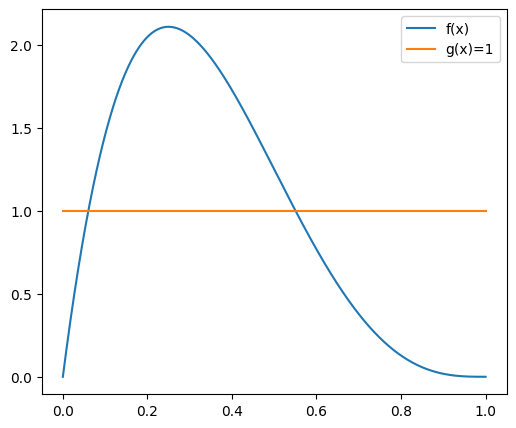

In [8]:
x=np.linspace(0,1,1000) #rango en x de (0,1)

y=20*x*((1-x)**3) #Función f(x)
g=np.full_like(x,1) #Función g(x)

plt.figure(figsize=(6,5)) #Crear figura
plt.plot(x,y,label="f(x)") #Grafica de f(x)
plt.plot(x,g,label="g(x)=1") #Grafica de g(x)
plt.legend()
plt.show()

1. Generar $Y$ con densidad $g$
2. Generar un número aleatorio $U\sim U(0,1)$
3. Si $U\leq \frac{f(x)}{c*g(x)}, \text {hacer} \ x=Y$, en caso contrario regresar al paso 1. \
$c$ es el factor de escalamiento. Es una constante que asegura que la curva de $f(x)$ siempre esté por debajo de la curva $c*g(x)$

Para obtener c, notamos que
$$\frac{f(x)}{g(x)}=20x(1-x)^3$$
derivamos
$$\frac{d}{dx} (\frac{f(x)}{g(x)}) = 20[(1-x)^3-3x(1-x)^2] = 0$$
resolvemos para x
$$(1-x)^3-3x(1-x)^2 \\
(1-x)[(1-x)^2-3x(1-x)] \\
(1-x)^2-3x(1-x) \\
1-2x+x^2-[3x-3x^2] = 1-2x+x^2-3x+3x^2 \\
=4x^2-5x+1 \\
x=\frac{-b\pm \sqrt{b^2-4ac}}{2a}=\frac{5 \pm \sqrt{-5^2-4(4)(1)}}{2(4)} \\
x_1=1 \\
x_2=\frac{1}{4}$$
Entonces
$$20[(1-x)^3-3x(1-x)^2] = c$$
Si $x_1=0, c=0$ \
Si $x_2=\frac{1}{4}, c=20(\frac{1}{4})(\frac{3}{4})^3= \frac{135}{64}$ \
Usaremos
$$c=\frac{135}{64}$$

In [9]:
def f(x) : #Devuelve el valor de f(x) para cada valor de x
 return 20*x*(1-x)**3

In [10]:
def g(x) : #Devuelve una lista de 1 de tamaño x
 return np.ones(x)

In [99]:
def AceptyRechazo(n): #Esta función devuelve muestras generadas
 lista1=[]      #por el método de aceptación y rechazo
 x_dentro=[] #Lista para valores aceptados (x,y)
 y_dentro=[]
 x_fuera=[] #Lista para valores rechazados (x,y)
 y_fuera=[]
 for i in range(n):
  y=rnd.random() #Generar un número aleatorio entre 0 y 1
  u=rnd.random() #para Y y u
  c=135/64
  if u<f(y) /c: #Aceptación
   lista1.append(y)
   x_dentro.append(y)
   y_dentro.append(u)
  else: #Rechazo
    x_fuera.append(y)
    y_fuera.append(u)
 return lista1,x_dentro,y_dentro,x_fuera,y_fuera

In [118]:
S,x_1,y_1,x_2,y_2,=AceptyRechazo(10000)
D=g(10000) #Distribución uniforme

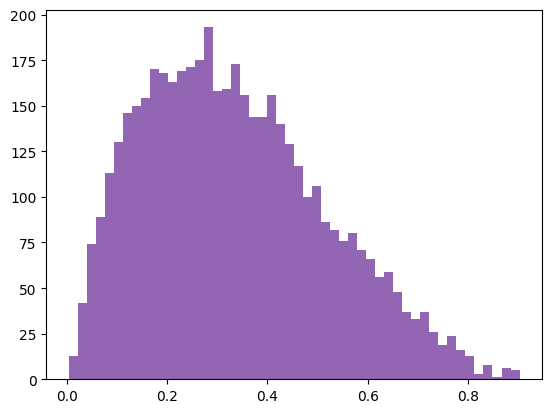

In [134]:
plt.hist(S, bins=50,color="indigo",alpha=0.6)
plt.show()

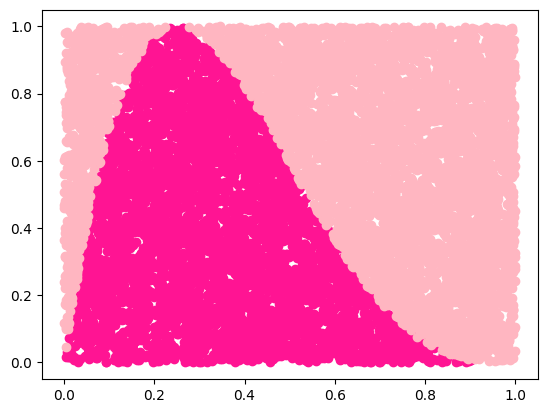

In [127]:
plt.scatter(x_1,y_1,color="deeppink")#Muestra aceptada
plt.scatter(x_2,y_2,color="lightpink") #Muestra rechazada
plt.show() #Muestra una gráfica f(x)/c

Una de las ventajas de este método es que no se requiere del conocimiento exacto de la función inversa de la distribución objetivo.

In [121]:
def cdf(G): #Función de distribución acumulada
 n=len(G)
 x=np.sort(G) #Ordenamos los datos
 y=np.arange(0,n)/n #Genera un array de numeros enteros de 0 a n-1
                    #El resultante se divide por n, para normalizar los valores
 return x,y

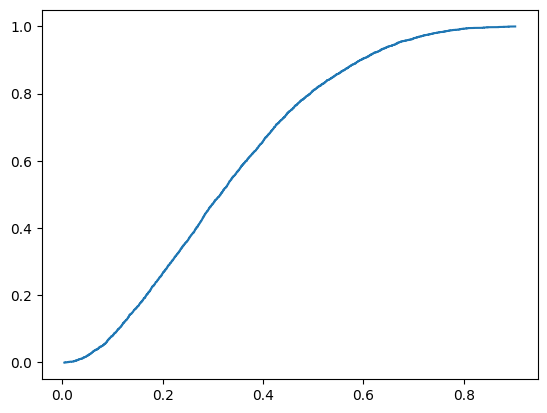

In [122]:
x,y=cdf(S)
plt.step(x,y)
plt.show()

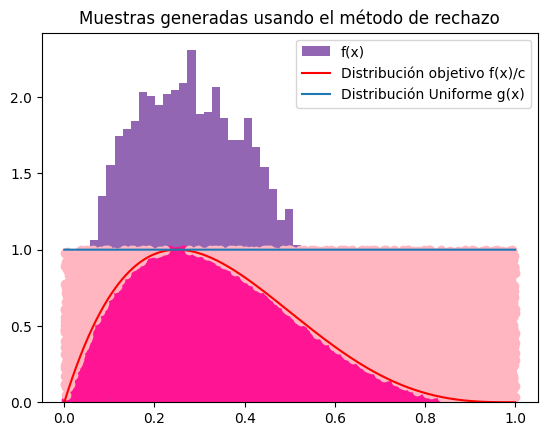

In [132]:
x = np.linspace(0, 1, 10000) #Rango del eje de las x
plt.hist(S, bins=50, density=True, alpha=0.6, color='indigo', label='f(x)')
plt.plot(x, f(x)/(135/64), 'r', label='Distribución objetivo f(x)/c')

plt.scatter(x_1,y_1,color="deeppink")#Muestra aceptada
plt.scatter(x_2,y_2,color="lightpink") #Muestra rechazada

plt.plot(x, D, label='Distribución Uniforme g(x)') #Grafica de g(x)

plt.legend()
plt.title('Muestras generadas usando el método de rechazo')
plt.show()